<a href="https://colab.research.google.com/github/viansebastian/curly-parakeet/blob/main/CV_Model_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import tensorflow as tf

print(tf.__version__)

2.14.0


In [33]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [34]:
mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

0
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16 

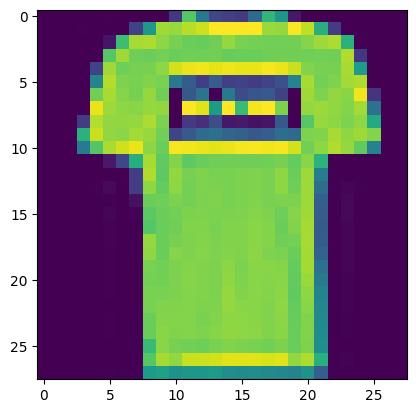

In [35]:
import matplotlib.pyplot as plt


plt.imshow(train_images[1])

print(train_labels[1])
print(train_images[1])

In [36]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # takes a square and turns it to a 1D Vector
    tf.keras.layers.Dense(512, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)

    # Dense adds a layer of neurons
    # Activation = tells each layer of neurons what to do
    # ReLu = filters value less than 0
    # Softmax = picks the biggest value
])

In [38]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )
model.fit(train_images, train_labels, epochs = 5, callbacks = [callbacks])

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.4772 - accuracy: 0.8292
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3600 - accuracy: 0.8696
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3222 - accuracy: 0.8817
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2986 - accuracy: 0.8896
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2806 - accuracy: 0.8946


In [ ]:
model.evaluate(test_images, test_labels)

138/313 [============>.................] - ETA: 0s - loss: 0.3566 - accuracy: 0.8684

In [ ]:
classifications = model.predict(test_images)
print(classifications[0])

In [ ]:
print(test_labels[3294])

0 : T-shirt/top

1 : Trouser

2 : Pullover

3 : Dress

4 : Coat

5 : Sandal

6 : Shirt

7 : Sneaker

8 :Bag

9 :Ankle boot